In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
import tensorflow as tf

class model:
    def __init__(self, /Users/rishabhtiwari/Documents/Uni Heidelberg/Academic Year Erasmus/Semester 1/Artificial Neural Network and Deep Learning/Practical/ANN-DL-Competition1/public_data.npz', allow_pickle=True):
        # Load the model from the given path
        self.model = tf.keras.models.load_model(path)

    def predict(self, X):
        # Perform prediction
        return self.model.predict(X)

SyntaxError: unterminated string literal (detected at line 4) (1020441730.py, line 4)

In [4]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (5200, 96, 96, 3)
Shape of y: (5200,)


In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load pre-trained VGG16 model without the top classification layer
model = VGG16(include_top=False, input_shape=(96, 96, 3), pooling='avg')

# Preprocess the images and predict to get feature vectors
X_preprocessed = preprocess_input(X)
features = model.predict(X_preprocessed)

163/163 [==============================] - 79s 484ms/step


In [6]:
from sklearn.decomposition import PCA

# Reduce the features to a manageable number before clustering
pca = PCA(n_components=50)  # For example, reduce to 50 principal components
X_pca = pca.fit_transform(features)

In [7]:
from sklearn.cluster import DBSCAN

# Cluster the data
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_pca)

# Identify cluster numbers; for DBSCAN, -1 indicates outliers
plant_clusters = set(clusters) - {-1}

In [8]:
# Assuming non-plant images are outliers and don't belong to any cluster
plant_indices = [i for i, cluster in enumerate(clusters) if cluster in plant_clusters]
X_plants = X[plant_indices]
y_plants = y[plant_indices]

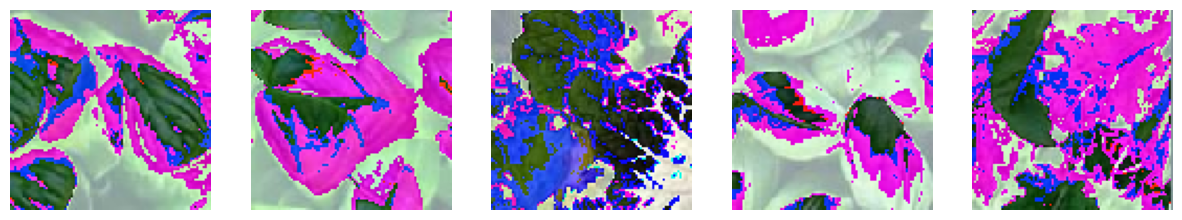

In [9]:
import matplotlib.pyplot as plt

# Display some images considered as outliers
outlier_indices = [i for i, cluster in enumerate(clusters) if cluster == -1]
sample_outliers = np.random.choice(outlier_indices, size=5, replace=False)

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(X[sample_outliers[i]].astype('uint8'))
    ax.axis('off')
plt.show()

In [10]:
# Save the clean dataset
np.savez('clean_plant_dataset.npz', X=X_plants, y=y_plants)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an image data generator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,       # Random rotations
    width_shift_range=0.2,   # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,         # Random shears
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Random horizontal flips
    fill_mode='nearest'      # Strategy for filling in newly created pixels
)

# Compute quantities required for featurewise normalization
datagen.fit(X_plants)

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_plants, y_plants, test_size=0.2, random_state=42)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
# This is a simple binary encoding for demonstration purposes.
# Your actual implementation may vary depending on the specifics of your dataset.

# Let's say your labels are 'healthy' and 'unhealthy'.
# You can map them to 0 and 1 as follows:
label_mapping = {'healthy': 0, 'unhealthy': 1}

# Convert string labels to numeric labels
y_train_numeric = np.array([label_mapping[label] for label in y_train])
y_val_numeric = np.array([label_mapping[label] for label in y_val])

In [17]:
# Now train the model with the numeric labels
history = model.fit(
    datagen.flow(X_train, y_train_numeric, batch_size=32),
    validation_data=(X_val, y_val_numeric),
    steps_per_epoch=len(X_train) // 32,
    epochs=50
)

Epoch 1/50
4/4 [==============================] - 1s 120ms/step - loss: 79.9381 - accuracy: 0.5806 - val_loss: 63.6875 - val_accuracy: 0.4750
Epoch 2/50
4/4 [==============================] - 0s 93ms/step - loss: 19.0484 - accuracy: 0.8468 - val_loss: 2.6666e-31 - val_accuracy: 1.0000
Epoch 3/50
4/4 [==============================] - 0s 94ms/step - loss: 0.0732 - accuracy: 0.9922 - val_loss: 2.1415e-36 - val_accuracy: 1.0000
Epoch 4/50
4/4 [==============================] - 0s 94ms/step - loss: 7.0981e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/50
4/4 [==============================] - 0s 90ms/step - loss: 9.2978e-28 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/50
4/4 [==============================] - 0s 94ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 91ms/step - loss: 1.9370e-33 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_

In [18]:

model.save(os.path.join(path, name))

NameError: name 'os' is not defined

In [24]:
model.save("/Users/rishabhtiwari/Documents/Uni Heidelberg/Academic Year Erasmus/Semester 1/Artificial Neural Network and Deep Learning/Practical/submission/Test1.keras")